In [14]:
library(treeio)
library(ggtree)
library(ggplot2)
library(ape)
library(ComplexHeatmap)
library(cowplot)
library(circlize)
library(ggtreeExtra)
library(ggnewscale)

In [15]:
metadata <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/scATAC_and_scRNA/multiome_RNA_metadata.csv',sep=',',header=T,row.names=1)
rownames(metadata) <- gsub('-1','',rownames(metadata))

In [16]:
cell_lineage <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/multiome/cell_lineage.csv',header = T,sep=',',row.names = 1)
cell_lineage

,lineageGrp
,<int>
GAGAACCAGGTGCTGC,3
CTTGCTCAGCTATGAC,3
CTTGTAAAGCGCAATT,3
CTTGTTCCAGTTATCG,3
CTTGTTTAGCTGGCTA,3
CTTTAGGCAATAACGA,3
CTTTGGGAGGCCGGAA,3
GAAACCCGTGTAATAC,3
GAAAGGCTCCCGCCTA,3


In [17]:
color_df <- read.table('/syn1/liangzhen/juanzhen_emt_tfseq_project/huzheng/ColorRG_match.txt',sep='\t',header=T)
color_df <- color_df[!is.na(color_df$color),]

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“The column of x aesthetic only have one unique value with `geom = geom_tile`,
and the `width` of `geom_tile()` is not provided, the `pwidth` will be as
`width`.”
Warning message:
“The column of x aesthetic only have one unique value with `geom = geom_tile`,
and the `width` of `geom_tile()` is not provided, the `pwidth` will be as
`width`.”


png 
  2

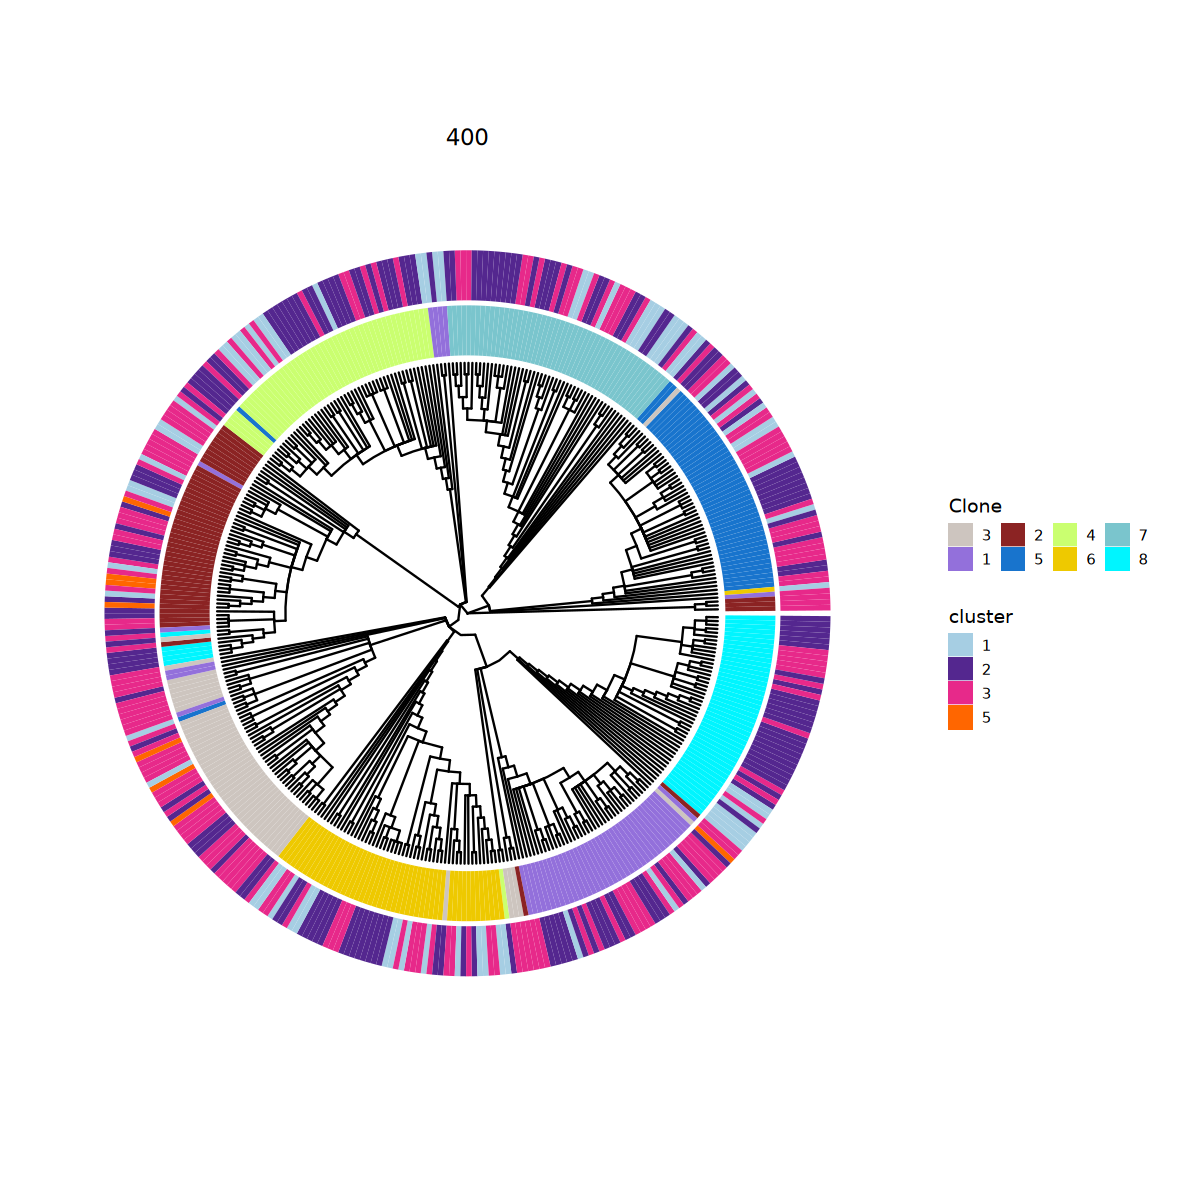

In [38]:
tree <- read.tree(paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/multiome/multiome-401.phy.treefile'))
tree <- root(tree, outgroup = "synthetic", resolve.root = TRUE)

tree <- drop.tip(tree,tree$tip.label[!(tree$tip.label %in% rownames(cell_lineage))])

tree_plot <- ggtree(tree,layout = 'fan', open.angle = 0,branch.length='none',size=0.5)
tree_plot$data$Clone <- 'Root'
tree_plot$data[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic','Clone'] <- as.character(cell_lineage[tree_plot$data$label[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'],'lineageGrp'])

tree_plot$data$cluster <- 'Root'
tree_plot$data[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic','cluster'] <- as.character(metadata[tree_plot$data$label[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'],'predicted.id'])

options(repr.plot.width=10, repr.plot.height=10)
pdf('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3.sup/atac_10_clone_tree.pdf',height=10,width=10)
plot <- tree_plot +
    new_scale_fill() +
     geom_fruit(
         geom=geom_tile,
         mapping=aes(fill=Clone),
         pwidth=max(tree_plot$data$x)*0.20,
         offset=0.13
     ) + scale_fill_manual(
         name="Clone",
         breaks=c('Root',unique(cell_lineage$lineageGrp)),
         values=c('gray',sample(color_df$color,length(unique(cell_lineage$lineageGrp)))),
         guide=guide_legend(keywidth=1, keyheight=1, ncol=5)
     ) + 
     new_scale_fill() +
     geom_fruit(
         geom=geom_tile,
         mapping=aes(fill=cluster),
         pwidth=max(tree_plot$data$x)*0.20,
         offset=0.22
     ) + scale_fill_manual(
         name="cluster",
         breaks=c('root','1','2','3','4','5'),
         values=c('black','#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600'),
         guide=guide_legend(keywidth=1, keyheight=1, ncol=1)
     )+
    ggtitle(length(tree$tip.label)) + theme(plot.title = element_text(hjust = 0.5))   
print(plot) 
dev.off()
print(plot) 